In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


In [2]:
sp=pd.read_csv('BKR.csv')

In [3]:
# Create your own Custom Strategy just comment/uncomment out accordingly
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, BBANDS, RSI, MACD and Volume SMA 20",
    ta=[
        #{"kind": "sma", "length": 12},
        # {"kind": "bbands", "length":12 },
        {"kind": "rsi"},
        #{"kind": "macd"},
        {"kind": "ema" }
        
    ]
)
# To run your "Custom Strategy"
sp.ta.strategy(CustomStrategy)

In [4]:
sp.columns=sp.columns.str.lower()
sp.head(40)

,date,open,high,low,close,adj close,volume,rsi_14,ema_10
0,2022-03-28,37.919998,37.939999,36.740002,37.000000,36.545021,7384500,NaN,NaN
1,2022-03-29,36.200001,36.720001,35.169998,36.669998,36.219078,13403000,NaN,NaN
2,2022-03-30,37.310001,37.560001,36.610001,37.349998,36.890717,9134100,NaN,NaN
3,2022-03-31,37.049999,37.770000,36.099998,36.410000,35.962276,11010200,NaN,NaN
4,2022-04-01,36.700001,37.200001,36.110001,36.419998,35.972153,8558800,NaN,NaN
5,2022-04-04,36.689999,36.790001,35.799999,36.430000,35.982029,8290000,NaN,NaN
6,2022-04-05,36.400002,37.299999,35.340000,35.520000,35.083221,12705300,NaN,NaN
7,2022-04-06,35.880001,36.389999,35.290001,35.720001,35.280762,8523600,NaN,NaN
8,2022-04-07,35.680000,36.220001,35.080002,36.119999,35.675838,9536200,NaN,NaN
9,2022-04-08,36.310001,37.599998,36.279999,37.520000,37.058628,12765800,NaN,36.515999


In [5]:
sp.date=pd.to_datetime(sp.date)

sp=sp.set_index('date').sort_index()



In [6]:
sp.head()

,open,high,low,close,adj close,volume,rsi_14,ema_10
date,,,,,,,,
2022-03-28,37.919998,37.939999,36.740002,37.000000,36.545021,7384500,NaN,NaN
2022-03-29,36.200001,36.720001,35.169998,36.669998,36.219078,13403000,NaN,NaN
2022-03-30,37.310001,37.560001,36.610001,37.349998,36.890717,9134100,NaN,NaN
2022-03-31,37.049999,37.770000,36.099998,36.410000,35.962276,11010200,NaN,NaN
2022-04-01,36.700001,37.200001,36.110001,36.419998,35.972153,8558800,NaN,NaN


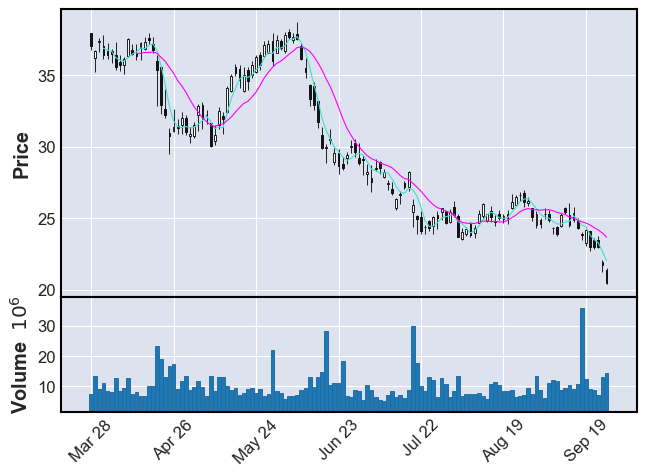

In [7]:
mpf.plot(sp,type='candle',volume=True, mav=(4,12))



In [8]:
nabors=pd.read_csv('NBR.csv')

In [9]:
nabors.columns= nabors.columns.str.lower()

nabors.ta.strategy(CustomStrategy)

nabors.date=pd.to_datetime(nabors.date)

nabors=nabors.set_index('date').sort_index()


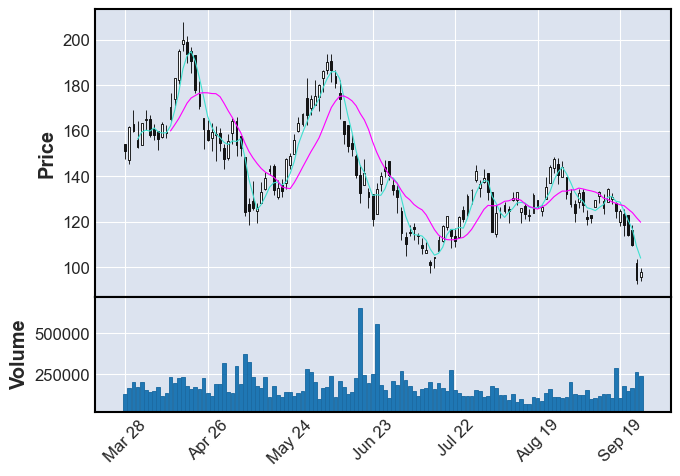

In [10]:
mpf.plot(nabors,type='candle',volume=True, mav=(4,12))

In [11]:
nabors.rename(columns = {'adj close':'nbrs_adj_close','volume':'nbrs_volume',
'RSI_14':'nbrs_rsi14','EMA_10':'nbrs_ema_10'}, inplace = True)
nabors=nabors.drop(columns={'open','high','low','close'})

nabors.head()

,nbrs_adj_close,nbrs_volume,nbrs_rsi14,nbrs_ema_10
date,,,,
2022-03-28,151.009995,131600,NaN,NaN
2022-03-29,161.720001,169500,NaN,NaN
2022-03-30,159.880005,205800,NaN,NaN
2022-03-31,152.720001,175100,NaN,NaN
2022-04-01,163.279999,205400,NaN,NaN


In [12]:
djogi=pd.read_csv('oil_and_gas_index.csv',skiprows=1)

In [13]:
djogi=djogi.dropna(how='all')
djogi=djogi.dropna(how="all",axis=1)
djogi=djogi.drop(261)

In [14]:
djogi.columns=djogi.columns.str.lower()
djogi.date=pd.to_datetime(djogi.date)
djogi=djogi.set_index('date').sort_index()

In [15]:
both_stock_data=sp.merge(nabors,how='inner',left_index=True, right_index=True)

In [16]:
both_stock_data

,open,high,low,close,adj close,volume,rsi_14,ema_10,nbrs_adj_close,nbrs_volume,nbrs_rsi14,nbrs_ema_10
date,,,,,,,,,,,,
2022-03-28,37.919998,37.939999,36.740002,37.000000,36.545021,7384500,NaN,NaN,151.009995,131600,NaN,NaN
2022-03-29,36.200001,36.720001,35.169998,36.669998,36.219078,13403000,NaN,NaN,161.720001,169500,NaN,NaN
2022-03-30,37.310001,37.560001,36.610001,37.349998,36.890717,9134100,NaN,NaN,159.880005,205800,NaN,NaN
2022-03-31,37.049999,37.770000,36.099998,36.410000,35.962276,11010200,NaN,NaN,152.720001,175100,NaN,NaN
2022-04-01,36.700001,37.200001,36.110001,36.419998,35.972153,8558800,NaN,NaN,163.279999,205400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-20,24.120001,24.120001,22.730000,23.000000,23.000000,9078600,38.431296,24.321140,118.459999,182100,42.667366,126.499551
2022-09-21,23.450001,23.600000,22.870001,23.020000,23.020000,8826100,38.577546,24.084569,114.040001,150100,40.100320,124.234179
2022-09-22,23.450001,23.770000,22.950001,22.969999,22.969999,7187100,38.332395,23.881920,109.709999,165500,37.706951,121.593419


In [17]:
stocks_and_index=both_stock_data.merge(djogi,how='inner',left_index=True, right_index=True)

In [18]:
stocks_and_index.head()

,open,high,low,close,adj close,volume,rsi_14,ema_10,nbrs_adj_close,nbrs_volume,nbrs_rsi14,nbrs_ema_10,index_level
date,,,,,,,,,,,,,
2022-03-28,37.919998,37.939999,36.740002,37.000000,36.545021,7384500,NaN,NaN,151.009995,131600,NaN,NaN,640.85
2022-03-29,36.200001,36.720001,35.169998,36.669998,36.219078,13403000,NaN,NaN,161.720001,169500,NaN,NaN,638.56
2022-03-30,37.310001,37.560001,36.610001,37.349998,36.890717,9134100,NaN,NaN,159.880005,205800,NaN,NaN,645.62
2022-03-31,37.049999,37.770000,36.099998,36.410000,35.962276,11010200,NaN,NaN,152.720001,175100,NaN,NaN,636.97
2022-04-01,36.700001,37.200001,36.110001,36.419998,35.972153,8558800,NaN,NaN,163.279999,205400,NaN,NaN,643.13


In [19]:
stocks_and_index=stocks_and_index.dropna()

stocks_and_index.isnull().sum()



open              0
high              0
low               0
close             0
adj close         0
volume            0
rsi_14            0
ema_10            0
nbrs_adj_close    0
nbrs_volume       0
nbrs_rsi14        0
nbrs_ema_10       0
index_level       0
dtype: int64

In [20]:
stocks_and_index.dtypes

open              float64
high              float64
low               float64
close             float64
adj close         float64
volume              int64
rsi_14            float64
ema_10            float64
nbrs_adj_close    float64
nbrs_volume         int64
nbrs_rsi14        float64
nbrs_ema_10       float64
index_level       float64
dtype: object

In [21]:
stocks_and_index=stocks_and_index.round(3)


In [22]:
stocks_and_index.describe().T

,count,mean,std,min,25%,50%,75%,max
open,112.0,2.910875e+01,4.626886e+00,21.380,2.511000e+01,2.799000e+01,3.248000e+01,3.800000e+01
high,112.0,2.963616e+01,4.720257e+00,21.530,2.554750e+01,2.875500e+01,3.313000e+01,3.866000e+01
low,112.0,2.844821e+01,4.521883e+00,20.420,2.461750e+01,2.757500e+01,3.136750e+01,3.753000e+01
close,112.0,2.901348e+01,4.612084e+00,20.450,2.506000e+01,2.821000e+01,3.227250e+01,3.782000e+01
adj close,112.0,2.881245e+01,4.483184e+00,20.450,2.504775e+01,2.799900e+01,3.187550e+01,3.753700e+01
volume,112.0,1.044470e+07,4.851158e+06,5347700.000,7.474125e+06,9.053150e+06,1.178372e+07,3.583420e+07
rsi_14,112.0,4.164387e+01,1.076408e+01,20.051,3.323000e+01,3.963350e+01,4.945225e+01,6.348200e+01
ema_10,112.0,2.956775e+01,4.402616e+00,22.938,2.529475e+01,2.903100e+01,3.340050e+01,3.696500e+01
nbrs_adj_close,112.0,1.381141e+02,2.238956e+01,94.400,1.236025e+02,1.331200e+02,1.520600e+02,2.000200e+02
nbrs_volume,112.0,1.731036e+05,8.317420e+04,70700.000,1.206500e+05,1.554500e+05,1.977750e+05,6.566000e+05


Text(0, 0.5, 'occurances')

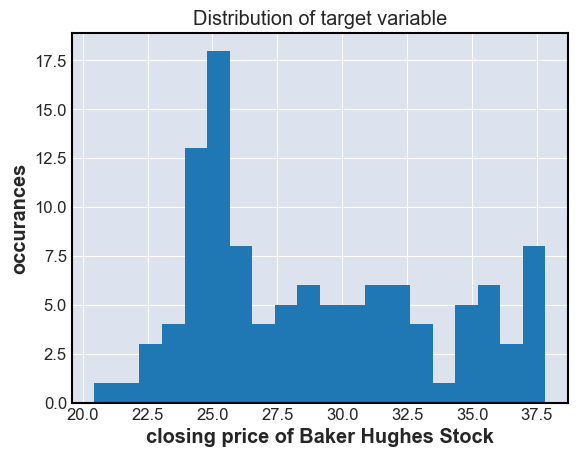

In [23]:

plt.hist(stocks_and_index.close,bins=20)
plt.title('Distribution of target variable')
plt.xlabel('closing price of Baker Hughes Stock')
plt.ylabel('occurances')

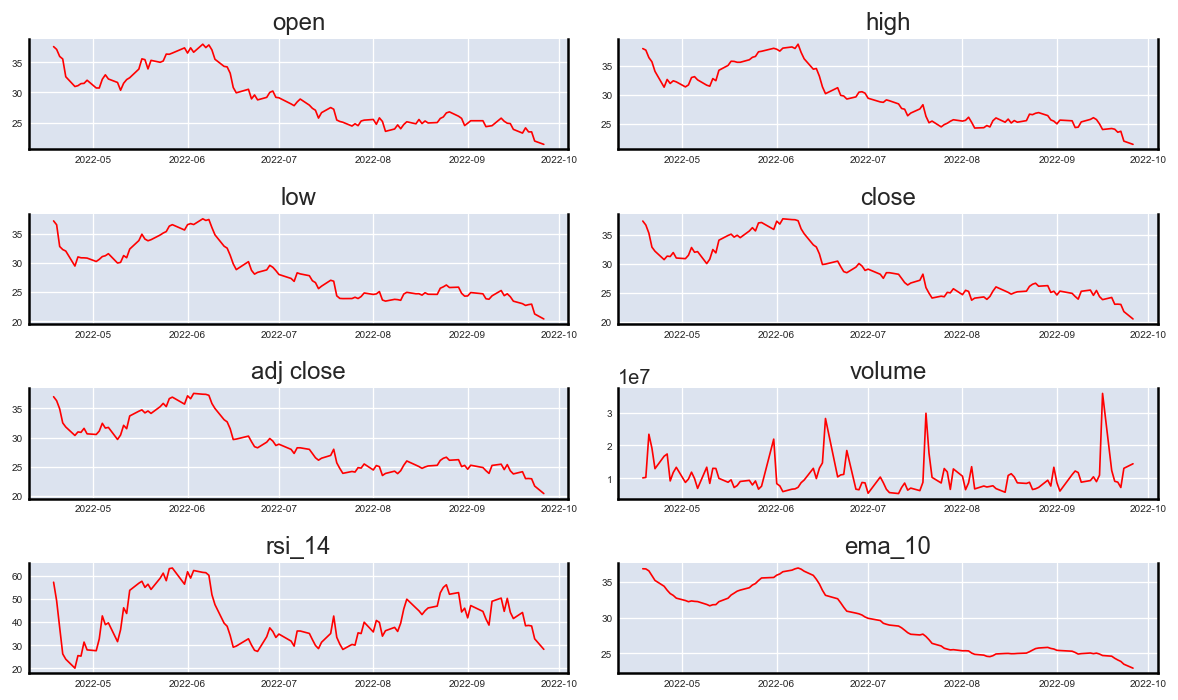

In [24]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = stocks_and_index[stocks_and_index.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(stocks_and_index.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Granger's Causality Test

## H_0 - historical values in series (x) do not have a causal relationship (historical values in regression equation = 0) with values in series (y)

## H_A - we reject the null hypothesis

In [25]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(stocks_and_index, variables = stocks_and_index.columns)    

,open_x,high_x,low_x,close_x,adj close_x,volume_x,rsi_14_x,ema_10_x,nbrs_adj_close_x,nbrs_volume_x,nbrs_rsi14_x,nbrs_ema_10_x,index_level_x
open_y,1.0000,0.0000,0.0000,0.0000,0.0000,0.0999,0.0000,0.0000,0.0000,0.5674,0.0000,0.0000,0.0000
high_y,0.0127,1.0000,0.0001,0.0000,0.0000,0.3928,0.0000,0.0000,0.0043,0.2757,0.0024,0.0133,0.1589
low_y,0.0016,0.0015,1.0000,0.0000,0.0000,0.1469,0.0265,0.0000,0.0031,0.0149,0.0034,0.0075,0.0063
close_y,0.0436,0.0859,0.0001,1.0000,0.0130,0.7724,0.1300,0.2747,0.0060,0.1059,0.0083,0.0279,0.3159
adj close_y,0.0423,0.0083,0.0040,0.0125,1.0000,0.7780,0.1790,0.0027,0.0063,0.1099,0.0085,0.0308,0.3300
volume_y,0.0180,0.0182,0.0265,0.2060,0.2214,1.0000,0.2270,0.0862,0.1934,0.1959,0.2657,0.1278,0.4928
rsi_14_y,0.0629,0.2484,0.0799,0.2837,0.3014,0.5688,1.0000,0.0436,0.0066,0.3122,0.0014,0.0273,0.1902
ema_10_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0000,1.0000,0.0150,0.0242,0.0023,0.0001,0.0000
nbrs_adj_close_y,0.0049,0.0000,0.0001,0.0095,0.0090,0.3643,0.0087,0.0002,1.0000,0.0807,0.2873,0.0248,0.0094
nbrs_volume_y,0.0002,0.0000,0.0000,0.0003,0.0003,0.6665,0.0308,0.0000,0.0101,1.0000,0.0474,0.0008,0.0094


In [26]:
# #checking stationarity
# from statsmodels.tsa.vector_ar.vecm import coint_johansen
# #since the test works for only 12 variables, I have randomly dropped one variable and 
# #in the next iteration, I would drop another and check the eigenvalues
# johan_test_temp = stocks_and_index.drop([ 'volume'], axis=1)
# coint_johansen(johan_test_temp,-1,1).eig

In [27]:
# # re-split my data proportionally 50/30/10 percent on train, validate, test respectively

# train_size = .50
# validate_size= .30
# n = stocks_and_index.shape[0]

# validate_start_index = round(train_size * n)
# validate_end_index = round((validate_size * n)+ validate_start_index)

# train = stocks_and_index[:validate_start_index] # everything up (not including) to the validate_start_index
# validate= stocks_and_index[validate_start_index:validate_end_index] # everything including validate_start_index up (not including to) validate_end_index
# test = stocks_and_index[validate_end_index:] # everything from the test_start_index to the end

# #plot to visualize my data split across time

# plt.plot(train.index, train.close)
# plt.plot(validate.index, validate.close)
# plt.plot(test.index, test.close)

In [28]:
nobs = 7 # refers to number of forecast observations
train, test = stocks_and_index[0:-nobs], stocks_and_index[-nobs:]

# Check size
print(train.shape)  # (119, 8)
print(test.shape)  # (4, 8)

(105, 13)
(7, 13)


# Augmented Dickey-Fuller test 

### checking for stationarity, differenceing if not stationary, then re-checking

In [29]:
from statsmodels.tsa.stattools import adfuller


def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [30]:
# ADF Test on each column
for name, column in train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "open" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5529
 No. Lags Chosen       = 0
 Critical value 1%     = -3.495
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.5072. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "high" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4198
 No. Lags Chosen       = 1
 Critical value 1%     = -3.495
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.5727. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root.

## confirmed that all series are not stationary. Will differnce them all below and re-run ADF test

In [31]:
df_differenced = train.diff().dropna()

In [32]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "open" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.413
 No. Lags Chosen       = 0
 Critical value 1%     = -3.495
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "high" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7147
 No. Lags Chosen       = 0
 Critical value 1%     = -3.495
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

## both ema columns are not stationary. will difference one more time to see if we can make it stationary

In [33]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [34]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "open" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.5307
 No. Lags Chosen       = 4
 Critical value 1%     = -3.499
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "high" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3078
 No. Lags Chosen       = 6
 Critical value 1%     = -3.5
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Te

#  All series are now stationary 

## Select the lag order (P) of VAR model 

# select the order with minimal Akaike information criterion (AIC) value



In [35]:


model = VAR(df_differenced)
for i in [1,2,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    # print('BIC : ', result.bic)
    # print('FPE : ', result.fpe)
    # print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  25.362265203622393
Lag Order = 2
AIC :  22.300662477008327
Lag Order = 4
AIC :  17.569500228433565
Lag Order = 5
AIC :  13.023379597414333
Lag Order = 6
AIC :  -1.4547773327054792
Lag Order = 7
AIC :  -170.09361525692347
Lag Order = 8
AIC :  -333.44509333033983
Lag Order = 9
AIC :  -375.9843529921465


/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
x = model.select_order(maxlags=2)
x.summary()

,AIC,BIC,FPE,HQIC
0,50.40,50.74,7.773e+21,50.54
1,24.96,29.67*,7.054e+10,26.86
2,22.30*,31.39,5.757e+09*,25.98*


## Lag order of 9 has lowest AIC, 

### train VAR model of 9

In [37]:
model_fitted = model.fit(9)
model_fitted.summary()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/vector_ar/var_model.py:1545: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 28, Sep, 2022
Time:                     16:31:51
---------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                    -334.480
Nobs:                     94.0000    HQIC:                   -359.220
Log likelihood:           17471.3    FPE:               -6.87160e-166
AIC:                     -375.984    Det(Omega_mle):    -1.75936e-170
---------------------------------------------------------------------
Results for equation open
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.002963         0.000107           27.660           0.000
L1.open                   0.141773              NAN              NAN             NAN
L1.high                  -0.627786     

# checking for serial correlation of errors using Durbin Watson's statistic (somewhere between 0-4, closer to 2 then no sig. corr.)

In [38]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(train.columns, out):
    print((col), ':', round(val, 2))

open : 2.48
high : 2.17
low : 3.07
close : 2.71
adj close : 2.62
volume : 2.47
rsi_14 : 2.33
ema_10 : 2.12
nbrs_adj_close : 2.63
nbrs_volume : 2.92
nbrs_rsi14 : 3.01
nbrs_ema_10 : 3.61
index_level : 3.11


In [39]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 9

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input


9


array([[ 2.00000000e-02,  1.10000000e+00,  5.50000000e-01,
         1.34000000e+00,  1.34000000e+00,  2.11400000e+06,
         9.53200000e+00,  1.56000000e-01,  1.75700000e+01,
         6.67000000e+04,  1.18070000e+01,  1.98300000e+00,
         2.75300000e+01],
       [-4.10000000e-01, -7.60000000e-01, -7.90000000e-01,
        -1.07000000e+00, -1.07000000e+00,  7.56580000e+06,
        -7.86900000e+00, -6.50000000e-02, -1.38600000e+01,
         1.03000000e+04, -9.28600000e+00, -8.97000000e-01,
        -1.96100000e+01],
       [-9.80000000e-01, -1.03000000e+00, -6.40000000e-01,
        -1.50000000e-01, -1.50000000e-01, -3.89110000e+06,
        -7.77000000e-01, -8.10000000e-02, -1.28000000e+00,
         2.48000000e+04, -5.23000000e-01, -9.66000000e-01,
         9.00000000e-01],
       [ 1.06000000e+00,  1.21000000e+00,  7.70000000e-01,
         8.00000000e-02,  8.00000000e-02, -1.57920000e+06,
         6.78000000e-01, -5.20000000e-02,  7.13000000e+00,
        -8.24000000e+04,  4.33200000e

# forecasting 7 days

In [42]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc,columns=stocks_and_index.columns + '_2d')
df_forecast

,open_2d,high_2d,low_2d,close_2d,adj close_2d,volume_2d,rsi_14_2d,ema_10_2d,nbrs_adj_close_2d,nbrs_volume_2d,nbrs_rsi14_2d,nbrs_ema_10_2d,index_level_2d
0,2.419973,4.488245,2.596696,4.977655,5.056670,-1.863735e+06,31.859375,0.734708,21.163410,184300.812119,14.847113,3.161162,105.283397
1,-0.935842,-2.948008,-3.741044,-6.984157,-7.150083,1.237705e+07,-40.157631,-0.666987,-38.864090,-414244.470280,-27.748198,-4.476535,-105.521147
2,-3.518777,-1.878754,1.433823,5.553711,5.564087,-3.118503e+07,26.755328,0.465796,7.443039,457749.882200,6.504241,-2.313698,18.910560
3,1.145934,-2.394657,-3.495987,-10.379891,-10.484707,3.429192e+07,-59.695548,-1.505986,-46.090057,18262.656749,-32.697327,-10.270929,-190.018561
4,-5.932184,-3.531304,3.135613,10.017574,9.952206,-4.186616e+07,54.699880,0.590151,64.380326,-134564.910779,45.813974,3.299822,130.496356
5,7.340385,3.540479,-0.852772,-9.141868,-9.039204,2.787820e+06,-55.926842,-1.189439,-49.132618,-839743.089254,-36.246863,-6.229905,-118.525650
6,-5.943969,2.114520,0.044952,10.641922,10.873229,2.633489e+07,75.781685,0.965308,79.234347,584485.642911,60.116970,9.302795,253.540013


## forecasted values are on the scale of training set used by the model

## will need to de-difference it the number of times it was differenced - in this case 2 times

In [43]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [51]:
train

,open,high,low,close,adj close,volume,rsi_14,ema_10,nbrs_adj_close,nbrs_volume,nbrs_rsi14,nbrs_ema_10,index_level
date,,,,,,,,,,,,,
2022-04-18,37.60,37.91,37.17,37.43,36.970,10120500,57.313,36.860,200.02,235200,81.135,175.918,673.68
2022-04-19,37.14,37.65,36.51,36.74,36.288,10264000,49.279,36.838,193.67,177500,73.121,179.145,667.87
2022-04-20,35.97,36.37,32.80,35.33,34.896,23404100,37.662,36.564,190.64,163600,69.590,181.235,670.61
2022-04-21,35.55,35.65,32.28,32.91,32.505,19153700,26.231,35.899,178.10,175600,57.263,180.665,649.18
2022-04-22,32.60,34.02,32.02,32.20,31.804,12918100,23.936,35.227,170.74,160700,51.497,178.861,633.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09,24.48,25.37,24.37,25.25,25.250,8810900,49.047,24.973,129.35,103000,49.712,128.729,675.32
2022-09-12,25.73,25.80,25.28,25.46,25.460,9306300,50.436,25.061,133.10,115300,52.202,129.524,687.01
2022-09-13,25.21,26.09,24.40,24.54,24.540,10450600,44.690,24.967,126.02,133000,47.427,128.887,670.55


In [55]:
df_results = invert_transformation(train, df_forecast, second_diff=True)        
df_results.loc[:,['open_forecast', 'high_forecast',	'low_forecast',	'close_forecast', 'adj close_forecast',
                  'volume_forecast','rsi_14_forecast',	'ema_10_forecast',	'nbrs_adj_close_forecast',	
                  'nbrs_volume_forecast','nbrs_rsi14_forecast','nbrs_ema_10_forecast','index_level_forecast']]


,open_forecast,high_forecast,low_forecast,close_forecast,adj close_forecast,volume_forecast,rsi_14_forecast,ema_10_forecast,nbrs_adj_close_forecast,nbrs_volume_forecast,nbrs_rsi14_forecast,nbrs_ema_10_forecast,index_level_forecast
0,27.189973,28.778245,26.316696,28.247655,28.326670,1.104436e+07,70.074375,25.518708,148.483410,263800.812119,62.958113,133.434162,760.953397
1,28.614105,29.578481,24.672349,25.181153,25.173257,2.352438e+07,55.723118,25.456429,127.192731,7657.153957,47.625027,132.301790,743.455647
2,26.519459,28.499964,24.461824,27.668362,27.583931,4.819354e+06,68.127190,25.859945,113.345091,209263.377995,38.796183,128.855718,744.868458
3,25.570747,25.026790,20.755313,19.775679,19.509897,2.040626e+07,20.835715,24.757475,53.407394,429132.258783,-2.729988,115.138718,556.262708
4,18.689851,18.022313,20.184414,21.900571,21.388069,-5.873002e+06,28.244119,24.245156,57.850023,514436.228791,1.557815,104.721540,498.153314
5,19.149341,14.558314,18.760743,14.883594,14.227037,-2.936444e+07,-20.274319,22.543399,13.160034,-240002.890454,-30.401245,88.074456,321.518270
6,13.664861,13.208836,17.382024,18.508541,17.939234,-2.652098e+07,6.988929,21.806949,47.704392,-409956.366788,-2.243335,80.730167,398.423239


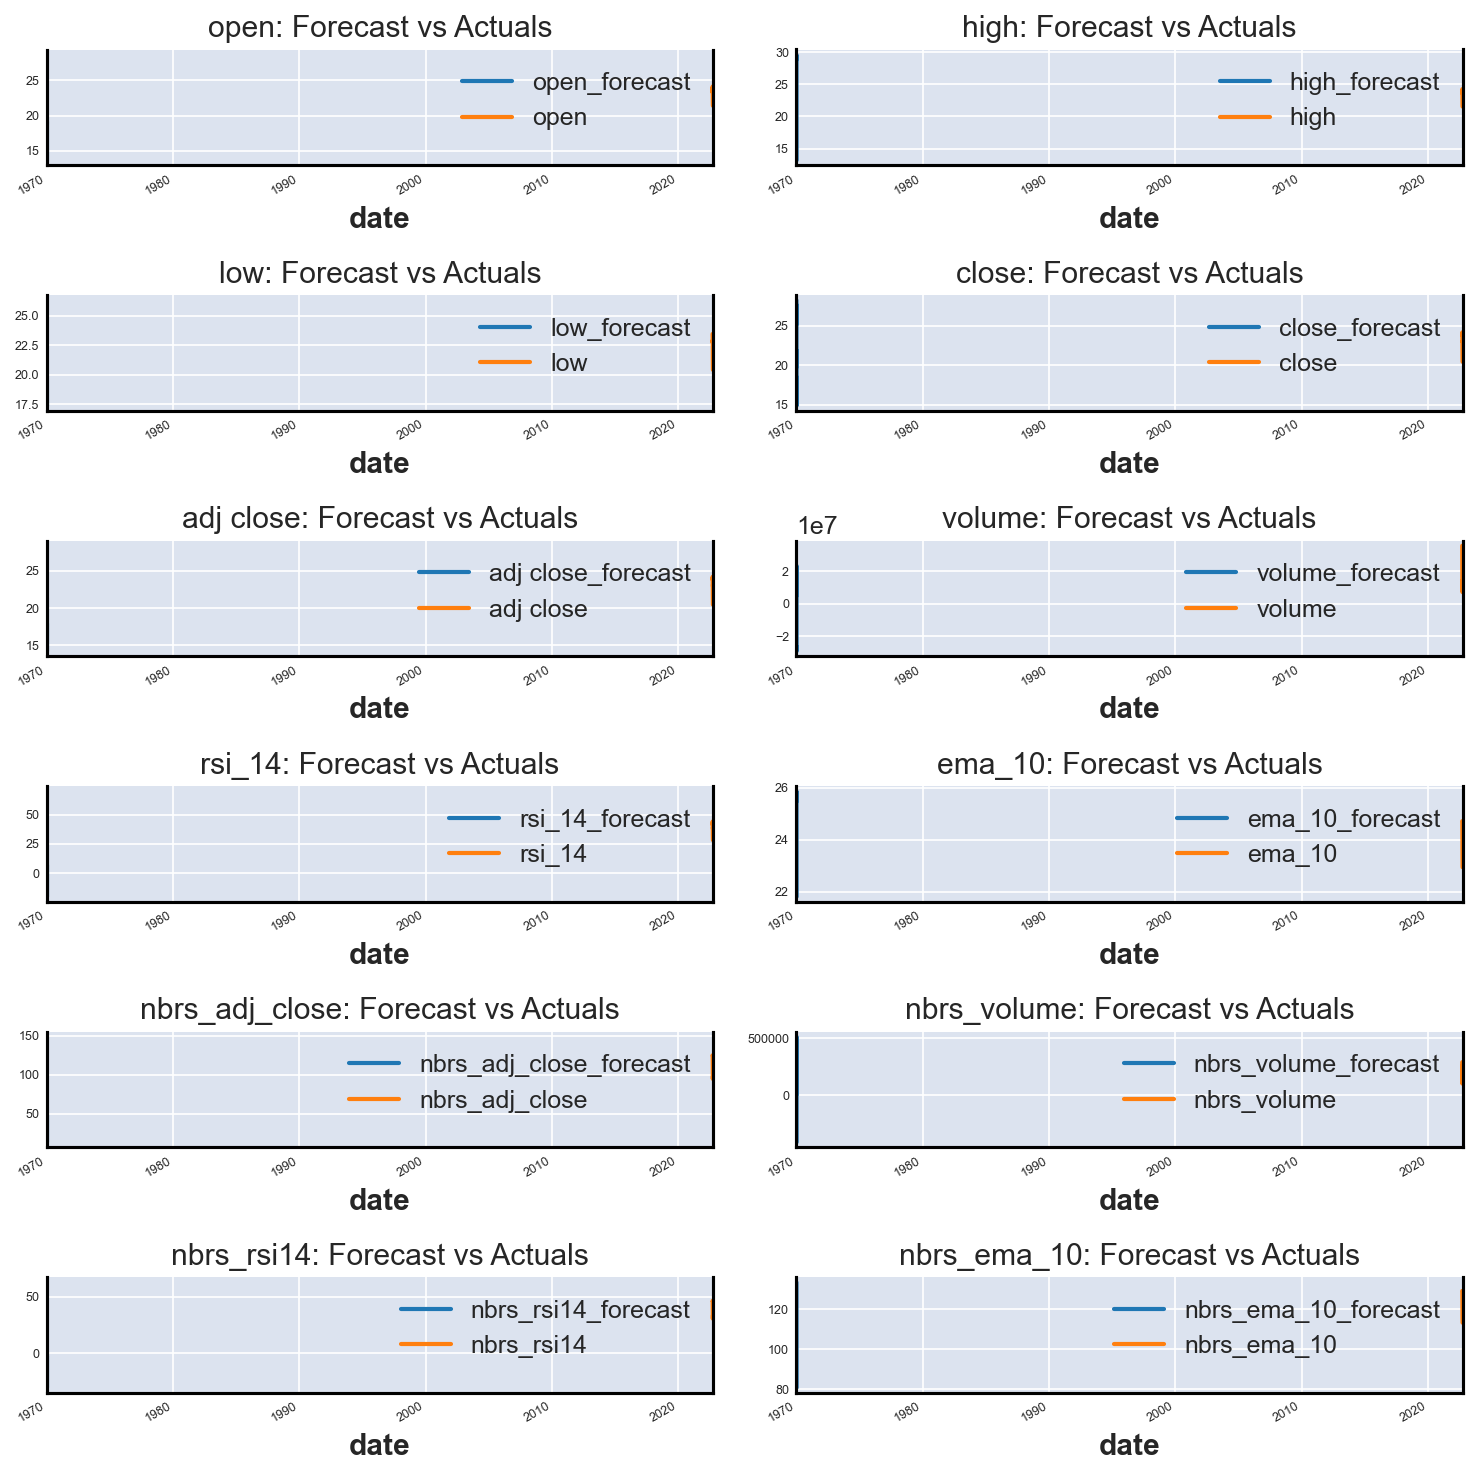

In [49]:
fig, axes = plt.subplots(nrows=int(len(stocks_and_index.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(stocks_and_index.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();